## Part 2: Python for Data Analysis
#### An Analysis of AirBnB Listings

The purpose of this exercise is to learn some basic data analysis and visualization techniques in Python while exploring the AirBnB listings data set for trends and other interesting insights. 

Research question: What factors impact review scores for airBnB listings?

Q: What are some fundamental steps you would take to try and answer this question?

In [3]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 

In [ ]:
# Set our working directory
# Always good practice to set your working directory
# The folder that Python is pointing to to read data from and read data to

# You will need to change this path to your own working directory.
# Make sure to include the r in your string to denote a string literal, as python 
# does not recognize back slashes without this notation

path = r'C:\Users\dglotzhober\Desktop\Python Training'
os.chdir(path)

In [5]:
# Read csv into a pandas dataframe
df = pd.read_csv('airbnb.csv')

# Notice warning about mixed data types.
df.head()

C:\Users\dglotzhober\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode
0,1,1.0,Real Bed,1,1,flexible,SF,True,8/15/2016,t,...,t,1/18/2017,37.773742,-122.391503,Mission Bay,5,Apartment,95,Private room,95202\r\r\r\r\r\r\r
1,1,1.0,Real Bed,1,1,flexible,LA,False,NaN,t,...,f,NaN,34.135680,-118.400691,Studio City,6,House,100,Private room,91604-3646
2,2,1.0,Real Bed,1,1,moderate,LA,True,11/16/2011,t,...,f,4/8/2017,34.192617,-118.136794,Altadena,136,Apartment,96,Entire home/apt,91001-2243
3,2,1.0,Real Bed,1,1,flexible,LA,False,NaN,t,...,f,NaN,34.023618,-118.501174,Santa Monica,0,Apartment,96,Private room,90403-2638
4,2,1.0,Real Bed,1,1,moderate,LA,True,9/6/2010,t,...,f,2/28/2017,34.104213,-118.260040,Silver Lake,16,House,99,Private room,90039-2715


In [7]:
df.iloc[0:25, [22]]

,zipcode
0,95202\r\r\r\r\r\r\r
1,91604-3646
2,91001-2243
3,90403-2638
4,90039-2715
5,90036-2514
6,90035-4475
7,90034-2203
8,90005-3747
9,60660-1448


In [7]:
# Reference/slice your data using numeric indexing
# Indexing starts at 0 rather than 1
df.iloc[-10:,[22]]

,zipcode
99559,2108
99560,2108
99561,2108
99562,2108
99563,2108
99564,2108
99565,2108
99566,2026
99567,210
99568,NaN


In [8]:
# Read in your data set but this time specify the data type
df = pd.read_csv('airbnb.csv', dtype={'zipcode':str})

In [9]:
# Let's find out the dimensions of our data set
print(df.shape, df.size)

(99569, 23) 2290087


In [ ]:
# Output first 5 rows of the data
df.head()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99569 entries, 0 to 99568
Data columns (total 23 columns):
accommodates              99569 non-null int64
bathrooms                 99569 non-null float64
bed_type                  99569 non-null object
bedrooms                  99569 non-null int64
beds                      99569 non-null int64
cancellation_policy       99569 non-null object
city                      99569 non-null object
cleaning_fee              99569 non-null bool
first_review              58247 non-null object
host_has_profile_pic      99569 non-null object
host_identity_verified    99569 non-null object
host_response_rate        99569 non-null int64
host_since                73923 non-null object
instant_bookable          99569 non-null object
last_review               58284 non-null object
latitude                  99569 non-null float64
longitude                 99569 non-null float64
neighbourhood             99569 non-null object
number_of_reviews         9956

## Data Cleaning

In [ ]:
# Identify columns and their data types
df.dtypes

In [12]:
df.columns.get_loc("zipcode")
df['zipcode'][(df['city']=='LA') & (df['property_type']=='Apartment')].head()

2    91001-2243
3    90403-2638
6    90035-4475
7    90034-2203
8    90005-3747
Name: zipcode, dtype: object

In [13]:
# Clean zip code data

# Extract only the first 5 characters 
df['zipcode'] = df['zipcode'].str[:5]

# left pad string with zeros up to 5 characters
df['zipcode'] = df['zipcode'].str.zfill(5)
df['zipcode'].head(n=5)

0    95202
1    91604
2    91001
3    90403
4    90039
Name: zipcode, dtype: object

In [14]:
# Convert date fields to datetime
df['first_review'] = pd.to_datetime(df['first_review'])
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [15]:
# Convert binary variables to 0 and 1 for consistency
df['cleaning_fee'] = np.where(df['cleaning_fee']==True, 1, 0)
df['host_has_profile_pic'] = np.where(df['host_has_profile_pic']=='t',1,0)
df['host_identity_verified'] = np.where(df['host_identity_verified']=='t',1,0)
df['instant_bookable'] = np.where(df['instant_bookable']=='t',1,0)

## Feature Engineering

Feature engineering is a process where you transform variables or create new variables for the purpose of improving model performance.

In [ ]:
df['property_type'].value_counts()

In [17]:
df['property_type_feature'] = df['property_type']

df['property_type_feature'][(df['property_type_feature'] != 'Apartment') & 
                            (df['property_type_feature'] != 'House')] = 'Other'

C:\Users\dglotzhober\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
df['property_type_feature'].value_counts()

Apartment    65675
House        22321
Other        11573
Name: property_type_feature, dtype: int64

In [19]:
# Segmenting
med_score = df['review_scores_rating'].median()
med_score

96.0

In [20]:
df['below_average'] = np.where(df['review_scores_rating'] < med_score, 1, 0)
df.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,...,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode,property_type_feature,below_average
0,1,1.0,Real Bed,1,1,flexible,SF,1,2016-08-15,1,...,37.773742,-122.391503,Mission Bay,5,Apartment,95,Private room,95202,Apartment,1
1,1,1.0,Real Bed,1,1,flexible,LA,0,NaT,1,...,34.135680,-118.400691,Studio City,6,House,100,Private room,91604,House,0
2,2,1.0,Real Bed,1,1,moderate,LA,1,2011-11-16,1,...,34.192617,-118.136794,Altadena,136,Apartment,96,Entire home/apt,91001,Apartment,0
3,2,1.0,Real Bed,1,1,flexible,LA,0,NaT,1,...,34.023618,-118.501174,Santa Monica,0,Apartment,96,Private room,90403,Apartment,0
4,2,1.0,Real Bed,1,1,moderate,LA,1,2010-09-06,1,...,34.104213,-118.260040,Silver Lake,16,House,99,Private room,90039,House,0


In [21]:
categorical_feats = ['bed_type', 'cancellation_policy', 'city', 'property_type_feature', 'room_type']
df_dummy = pd.get_dummies(df, columns=categorical_feats, drop_first=True)
df_dummy.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,...,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,property_type_feature_House,property_type_feature_Other,room_type_Private room,room_type_Shared room
0,1,1.0,1,1,1,2016-08-15,1,1,100,2013-07-04,...,0,0,0,0,0,1,0,0,1,0
1,1,1.0,1,1,0,NaT,1,0,100,NaT,...,0,0,0,1,0,0,1,0,1,0
2,2,1.0,1,1,1,2011-11-16,1,1,100,2011-09-19,...,0,0,0,1,0,0,0,0,0,0
3,2,1.0,1,1,0,NaT,1,0,100,2016-03-07,...,0,0,0,1,0,0,0,0,1,0
4,2,1.0,1,1,1,2010-09-06,1,1,100,2010-08-04,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
# Lambda function coupled with apply on a pandas series
df = df.sort_values(by='first_review')
df['month'] = df['first_review'].apply(lambda x: x.month)
df

In [27]:
# This does the same thing functionally as lambda function above
# This function takes in an input parameter called "date" and returns the month of that date.
def retrieveMonth(date):
    return date.month

## Exploration/Visualization

In [30]:
# We can make pivot tables using pandas just like we would in excel
df_pivot = pd.pivot_table(df,
               values=['review_scores_rating', 'host_response_rate'],
               index='neighbourhood', 
               aggfunc={'review_scores_rating': np.mean,
                        'host_response_rate': np.mean})[['review_scores_rating', 'host_response_rate']]
df_pivot.head()

,review_scores_rating,host_response_rate
neighbourhood,,
16th Street Heights,95.530769,97.423077
Adams Morgan,95.381818,95.200000
Alamo Square,96.124031,93.775194
Albany Park,96.541667,99.166667
Alhambra,94.666667,98.545455


We might hypothesize that review scores and response rate are correlated. Let's see how that pans out by plotting the correlation.


In [ ]:
sns.regplot(x="review_scores_rating", y="host_response_rate", data=df_pivot);

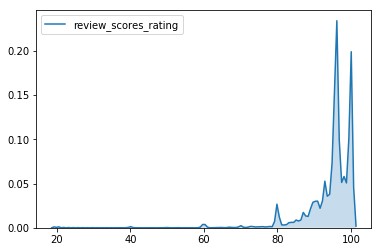

In [356]:
sns.kdeplot(df['review_scores_rating'], shade=True)

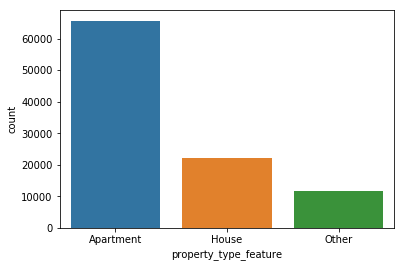

In [42]:
sns.countplot(x='property_type_feature', data=df)

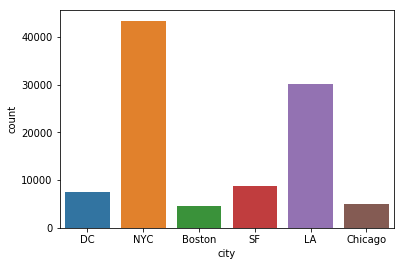

In [43]:
sns.countplot(x='city', data=df)

In [75]:
df['cancellation_policy'].value_counts()

strict             43504
flexible           30435
moderate           25450
super_strict_30      154
super_strict_60       25
long_term              1
Name: cancellation_policy, dtype: int64

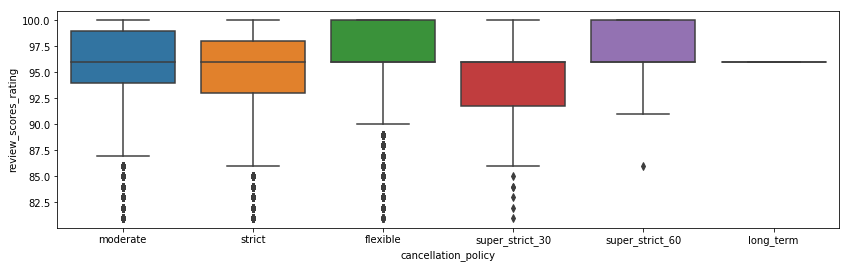

In [68]:
plt.figure(figsize=(14, 4))
sns.boxplot(x='cancellation_policy', y='review_scores_rating', data=df[df['review_scores_rating']>80])

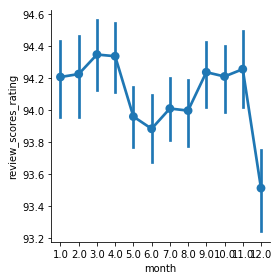

In [69]:
sns.factorplot(data= df, 
               x= 'month',
               y= 'review_scores_rating'
              )

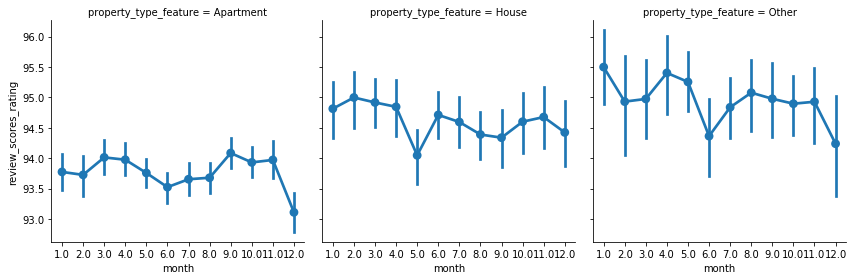

In [71]:
sns.factorplot(data= df, 
               x= 'month',
               y= 'review_scores_rating',
               col='property_type_feature'
              )